        P(#H>=2): 0.9887
           P(H1): 0.4977
 P(H1), 1K iters: 0.495
         P(#H>5): 0.3795
      P(#H>5|H1): 0.4963206046141607
      P(H1|#H>5): 0.659084898175086
 P(#H>5|H1,H>=2): 0.5024312791505409
           E(#H): 4.9855
        E(#H|H1): 5.50337770713
         Var(#H): 2.5297497775
      Var(#H|H1): 2.22159429454
1st moment of #H: 5.0102
2nd moment of #H: 27.4221
3rd moment of #H: 160.8759
4th moment of #H: 1023.1357
  Skewness of #H: -0.00957863687648 (using nth_moment_of w/ central=True, normalized=True)
  Skewness of #H: -0.00627104672933 (using helper function)
  Kurtosis of #H: 2.81400670884


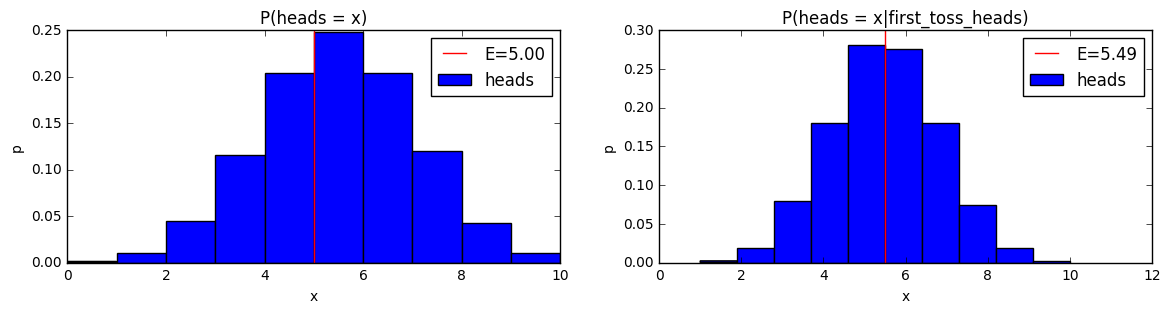

In [4]:
from sample_space import *

class NCoinTosses(Experiment):
    def __init__(self, n, p):
        self.n = n
        self.p = p

    def rerun(self):
        self.tosses = [Bern(self.p) for _ in range(self.n)]

    def heads(self):
        return sum(self.tosses)

    def there_are_at_least_two_heads(self):
        return self.heads() >= 2

    def first_toss_heads(self):
        return self.tosses[0]

space = SampleSpace(NCoinTosses(10, 0.5), iters=20000)

# ask for probability of any truthy method
print('        P(#H>=2):', space.probability_that('there_are_at_least_two_heads'))

# alias for the above, if it's more grammatical
print('           P(H1):', space.probability_of('first_toss_heads'))

# change the number of iterations
print(' P(H1), 1K iters:', space.probability_of('first_toss_heads', iters=1000))

# ask for probabilities of functions of random variables
print('         P(#H>5):', space.probability_that(['heads', is_greater_than(5)]))

# ask for conditional probabilities
print('      P(#H>5|H1):', space.probability_that(['heads', is_greater_than(5)], given=['first_toss_heads']))
print('      P(H1|#H>5):', space.probability_of('first_toss_heads', given=[['heads', is_greater_than(5)]]))
print(' P(#H>5|H1,H>=2):', space.probability_that(['heads', is_greater_than(5)],
    given=['first_toss_heads', 'there_are_at_least_two_heads']))

# ask for expectations, variances, and moments, conditionally or absolutely
print('           E(#H):', space.expected_value_of('heads'))
print('        E(#H|H1):', space.expected_value_of('heads', given=['first_toss_heads']))
print('         Var(#H):', space.variance_of('heads'))
print('      Var(#H|H1):', space.variance_of('heads', given=['first_toss_heads']))
print('1st moment of #H:', space.nth_moment_of('heads', 1))
print('2nd moment of #H:', space.nth_moment_of('heads', 2))
print('3rd moment of #H:', space.nth_moment_of('heads', 3))
print('4th moment of #H:', space.nth_moment_of('heads', 4))
print('  Skewness of #H:', space.nth_moment_of('heads', 3, central=True, normalized=True), '(using nth_moment_of w/ central=True, normalized=True)')
print('  Skewness of #H:', space.skewness_of('heads'), '(using helper function)')
print('  Kurtosis of #H:', space.kurtosis_of('heads'))

# some plots
fig = plt.figure(figsize=(14,3))

# plot distribution histograms
fig.add_subplot(121)
space.plot_distribution_of('heads') # pass kwargs
plt.legend()

# plot conditional distribution histograms
fig.add_subplot(122)
space.plot_distribution_of('heads', given=['first_toss_heads'], bins=10) # can pass kwargs
plt.legend()
plt.show()